In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
df=pd.read_csv('fcc-forum-pageviews.csv')

In [46]:
df.set_index('date',inplace=True)

In [47]:
df.columns=['views']

In [48]:
df.head()

,views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [49]:
df['views']=(df['views']>=df['views'].quantile(0.025))&(df['views']>=df['views'].quantile(0.975))

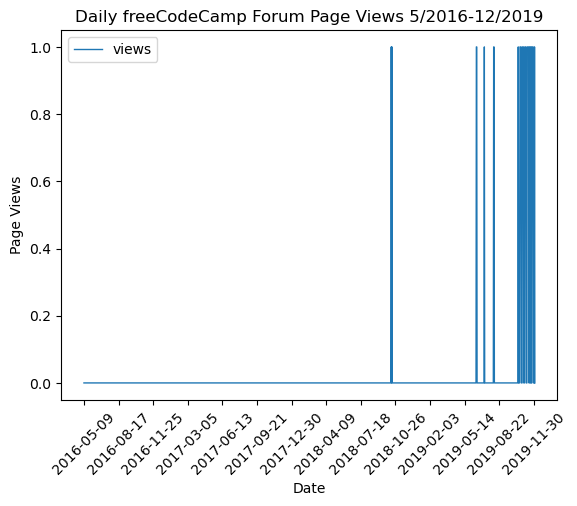

In [50]:
def draw_line_plot(df):
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)
    plt.gca().set_xticks(np.arange(0, len(df), 100)) 

    sns.lineplot(df,
                linewidth=1,
                 
               )
draw_line_plot(df)

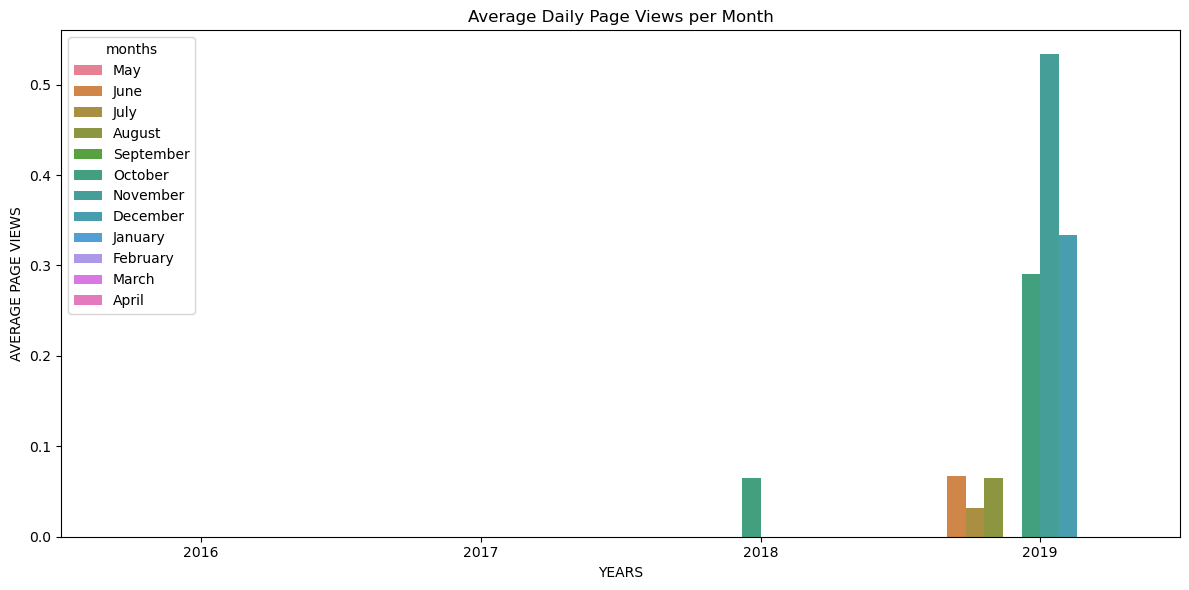

In [62]:
def draw_bar_plot(df):

    df.index=pd.to_datetime(df.index)
    df['years']=df.index.year
    df['month']=df.index.month_name()
    grouped=df.groupby(['years','month'], sort=False)['views'].mean().reset_index()
    plt.figure(figsize=(12,6))
    sns.barplot(data=grouped,x='years',y='views',hue='month')
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('YEARS')
    plt.ylabel('AVERAGE PAGE VIEWS')
   
    plt.legend(title='months')
    plt.tight_layout()
    plt.show()
draw_bar_plot(df)

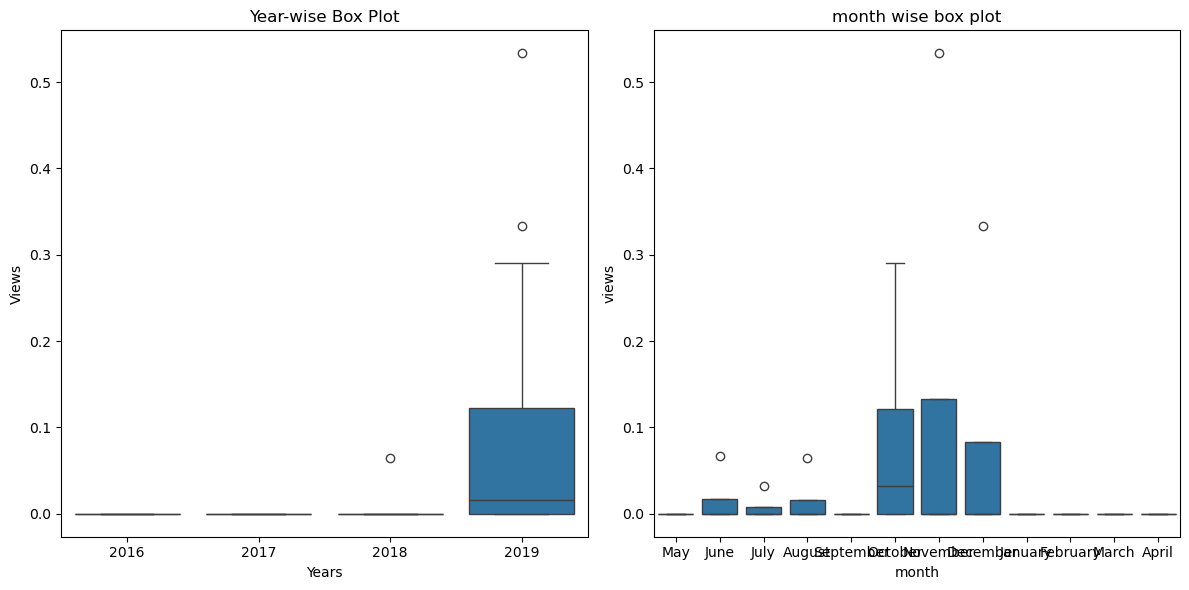

In [72]:
def draw_box_plot(df):
    df.index=pd.to_datetime(df.index)
    df['years']=df.index.year
    df['month']=df.index.month_name()
    grouped=df.groupby(['years','month'], sort=False)['views'].mean().reset_index()
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(data=grouped,x='years',y='views',ax=axes[0])
    axes[0].set_title("Year-wise Box Plot")
    axes[0].set_xlabel("Years")
    axes[0].set_ylabel("Views")


    sns.boxplot(data=grouped,x='month',y='views',ax=axes[1])
    axes[1].set_title('month wise box plot')
    axes[1].set_xlabel('month')
    axes[1].set_ylabel('views')

    plt.tight_layout()
    plt.show()
draw_box_plot(df)


